# Libraries

In [3]:
import bw2data as bd
import bw2io as bi
import bw2calc as bc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Confugurando projetos

In [6]:
name_project = 'stainless_steel'
bd.projects.set_current(name_project)

#Setting database

if 'ecoinvent-3.9.1-cutoff' in bd.databases:
    print('ecoinvent 3.9.1 is already present in the project')
else:
    bi.import_ecoinvent_release(
        version='3.9.1',
        system_model='cutoff', # can be cutoff / apos / consequential / EN15804
        username='precon6380',
        password='VpmJ4QB8Yn'
    )

ecoinvent 3.9.1 is already present in the project


In [5]:
list(bd.projects) #the prefix "bw" indicates that "projects" is a method of the bw2data package
print(bd.projects.current)

eidb = bd.Database("ecoinvent-3.9.1-cutoff")


stainless_steel


# Filtrando metodos

In [ ]:
methods = []
impacts = [
    "climate change",
    "material resources",
    "energy resource",
    "water use",
    "eutrophication: freshwater",
    "ecotoxicity: freshwater"
]

In [75]:
ef_methods = [m for m in bd.methods if "EN15804" in m[1] and "ecotoxicity: freshwater" in m[2].lower()]

# Mostrar los métodos encontrados
for method in ef_methods:
    print(method)
    print(type(method))

('ecoinvent-3.9.1', 'EF v3.0 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)')
<class 'tuple'>
('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)')
<class 'tuple'>


In [ ]:
methods.append(ef_methods[1])
print(methods)


[('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)'), ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)'), ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels'), ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)'), ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)'), ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)')]


In [58]:
# Crear el diccionario
impact_category_to_method = {m[2]: m for m in methods}

# Mostrar el resultado
for impact, method in impact_category_to_method.items():
    print(f"{impact} → {method}")


climate change → ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)')
material resources: metals/minerals → ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)')
energy resources: non-renewable → ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')
water use → ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)')
eutrophication: freshwater → ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)')
ecotoxicity: freshwater → ('ecoinvent-3.9.1', 'EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)')


In [66]:
df_methods = pd.DataFrame({'impact' : impacts,
                           'Method' : methods
})
df_methods

df_methods.to_csv('methodes.csv', index= False)

In [11]:
bd.methods

Methods dictionary with 762 objects, including:
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'acidification', 'acidification (incl. fate, average Europe total, A&B)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'ecotoxicity: freshwater', 'freshwater aquatic ecotoxicity (FAETP inf)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'ecotoxicity: marine', 'marine aquatic ecotoxicity (MAETP inf)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'ecotoxicity: terrestrial', 'terrestrial ecotoxicity (TETP inf)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)')
	('ecoinvent-3.9.1', 'CML v4.8 2016', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimat

# Mapeando actividades de ciclo de vida

In [ ]:
activities_cv = [
    "acier_prefini",
    "production_nylon",
    "acier_lamine",
    "fab_pieces",
    "construction",
    "desinstallation_pieux",
    "recyclge_acier",
    "transport_voiture",
    "transport_camion",

]

df_mapping = pd.DataFrame({
    "variable": activities_cv,
    "unit": [None] * len(activities_cv),
    "location": [None] * len(activities_cv),
    "activity_id": [None] * len(activities_cv),
})

print(df_mapping)

                variable  unit location activity_id
0          acier_prefini  None     None        None
1           acier_lamine  None     None        None
2             fab_pieces  None     None        None
3           construction  None     None        None
4  desinstallation_pieux  None     None        None


In [12]:
search_terms = {
    "acier_prefini": "steel production, electric, chromium steel 18/8",
    "acier_lamine": "steel production, chromium steel 18/8, hot rolled",
    "fab_pieces": "laser machining",
    "construction": "diesel, burned in building machine",
    "desinstallation_pieux": "deconstruction", 
}

In [33]:
results = eidb.search(search_terms['fab_pieces'])
results



['market for laser machining, metal, with CO2-laser, 2000W power' (hour, GLO, None),
 'market for laser machining, metal, with CO2-laser, 4000W power' (hour, GLO, None),
 'market for laser machining, metal, with CO2-laser, 2700W power' (hour, GLO, None),
 'market for laser machining, metal, with CO2-laser, 5000W power' (hour, GLO, None),
 'market for laser machining, metal, with CO2-laser, 3200W power' (hour, GLO, None),
 'market for laser machining, metal, with CO2-laser, 6000W power' (hour, GLO, None),
 'market for laser machining, metal, with YAG-laser, 60W power' (hour, GLO, None),
 'market for laser machining, metal, with YAG-laser, 120W power' (hour, GLO, None),
 'market for laser machining, metal, with YAG-laser, 500W power' (hour, GLO, None),
 'market for laser machining, metal, with YAG-laser, 200W power' (hour, GLO, None),
 'market for laser machining, metal, with YAG-laser, 30W power' (hour, GLO, None),
 'market for laser machining, metal, with YAG-laser, 40W power' (hour, G

In [34]:
selected = results[17]
selected

'laser machining, metal, with CO2-laser, 4000W power' (hour, RER, None)

In [32]:
df_mapping.loc[df_mapping["variable"] == 'construction', "unit"] = selected["unit"]
df_mapping.loc[df_mapping["variable"] == 'construction', "location"] = selected["location"]
df_mapping.loc[df_mapping["variable"] == 'construction', "activity_id"] = selected.id  
df_mapping

,variable,unit,location,activity_id
0,acier_prefini,kilogram,RER,206853134430044160
1,acier_lamine,kilogram,RER,206853083444084737
2,fab_pieces,hour,RER,206853189195071488
3,construction,hour,GLO,206853116566503424
4,desinstallation_pieux,None,None,None


In [36]:
act = bd.get_activity(206853134430044160)
act


'steel production, electric, chromium steel 18/8' (kilogram, RER, None)

In [37]:
df_mapping.to_csv('activities.csv', index=False)


In [64]:
dict_actividades = {
    row[0]: bd.get_activity(row[3])  # eval convierte el string del ID a tupla
    for _, row in df_mapping.iterrows()
    if pd.notnull(row[3])  # solo si hay un ID válido
}

for var, act in dict_actividades.items():
    print(f"{var} → {act['name']} ({act['location']})")

C:\Users\sotoale\AppData\Local\Temp\ipykernel_9592\353791785.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.notnull(row[3])  # solo si hay un ID válido
C:\Users\sotoale\AppData\Local\Temp\ipykernel_9592\353791785.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[0]: bd.get_activity(row[3])  # eval convierte el string del ID a tupla


acier_prefini → steel production, electric, chromium steel 18/8 (RER)
acier_lamine → steel production, chromium steel 18/8, hot rolled (RER)
fab_pieces → laser machining, metal, with CO2-laser, 4000W power (RER)
construction → machine operation, diesel, >= 18.64 kW and < 74.57 kW, steady-state (GLO)


# Evaluation des impacts

In [89]:
config = {
    "impact_categories": list(impact_category_to_method.values())
}
config


{'impact_categories': [('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'water use',
   'user deprivation potential (deprivation-weighted water consumption)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'energy resources: non-renewable',
   'abiotic depletion potential (ADP): fossil fuels'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'material resources: metals/minerals',
   'abiotic depletion potential (ADP): elements (ultimate reserves)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'eutrophication: freshwater',
   'fraction of nutrients reaching freshwater end compartment (P)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'ecotoxicity: freshwater',
   'comparative toxic unit for ecosystems (CTUe)')]}

In [71]:
functional_units = {
    'acier_prefini':   {dict_actividades['acier_prefini'].id: 200},
    'acier_lamine':    {dict_actividades['acier_lamine'].id: 150},
    'fab_pieces':      {dict_actividades['fab_pieces'].id: 20},
    'construction':    {dict_actividades['construction'].id: 10},
}

functional_units

{'acier_prefini': {206853134430044160: 200},
 'acier_lamine': {206853083444084737: 150},
 'fab_pieces': {206853189195071488: 20},
 'construction': {206853116566503424: 10}}

In [90]:
data_objs_2 = bd.get_multilca_data_objs(functional_units=functional_units, method_config=config)

In [74]:
mlca_2 = bc.MultiLCA(demands=functional_units, method_config=config, data_objs=data_objs_2)
mlca_2.lci()
mlca_2.lcia()
mlca_2.scores

{(('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'water use',
   'user deprivation potential (deprivation-weighted water consumption)'),
  'acier_prefini'): 264.02282403520974,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'water use',
   'user deprivation potential (deprivation-weighted water consumption)'),
  'acier_lamine'): 250.87829279408518,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'water use',
   'user deprivation potential (deprivation-weighted water consumption)'),
  'fab_pieces'): 275.801448690233,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'water use',
   'user deprivation potential (deprivation-weighted water consumption)'),
  'construction'): 6.993970588480983,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  'acier_prefini'): 931.0840639983323,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  'acier_lamine'): 779.3803593306142,
 (('ecoinvent-3.9.1

In [97]:
# Invertimos el diccionario
method_to_category = {v: k for k, v in impact_category_to_method.items()}

dfresults = pd.DataFrame.from_dict(mlca_2.scores, orient='index')
dfresults.index = pd.MultiIndex.from_tuples(dfresults.index, names=['Column', 'Row'])
dfresults = dfresults.unstack(level=0)
# Renombramos columnas del DataFrame
dfresults.rename(columns=method_to_category, inplace=True)

dfresults

0                          \
Column        climate change ecotoxicity: freshwater   
Row                                                    
acier_lamine      779.380359             3133.745404   
acier_prefini     931.084064             3760.507352   
construction      216.446718             1341.696289   
fab_pieces        503.734286             2188.445916   

                                                                          \
Column        energy resources: non-renewable eutrophication: freshwater   
Row                                                                        
acier_lamine                      8750.715658                   0.268378   
acier_prefini                    10727.942452                   0.337661   
construction                      2827.409958                   0.006584   
fab_pieces                       11000.950717                   0.465709   

                                                               
Column        material resources: metals/minerals   water use  
Row                                                            
acier_lamine                             0.018911  250.878293  
acier_prefini                            0.025125  264.022824  
construction                             0.000077    6.993971  
fab_pieces                               0.009327  275.801449

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

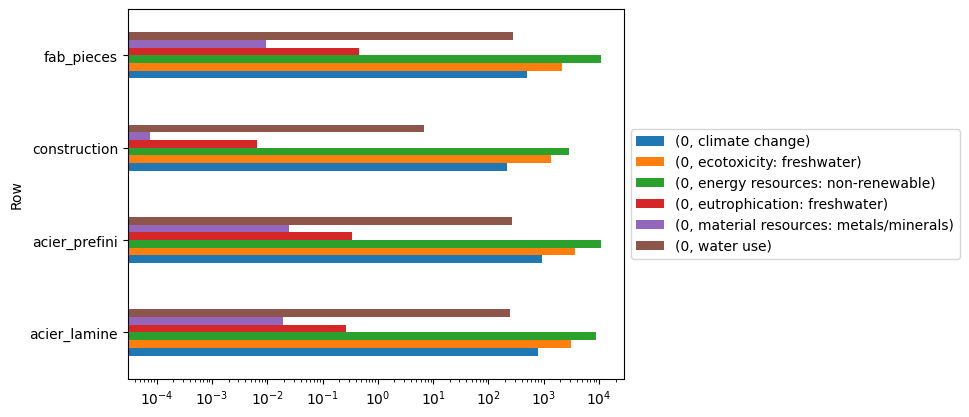

In [98]:
dfresults.plot(kind="barh")
ax = plt.subplot(111)
plt.xscale("log")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height, box.width, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

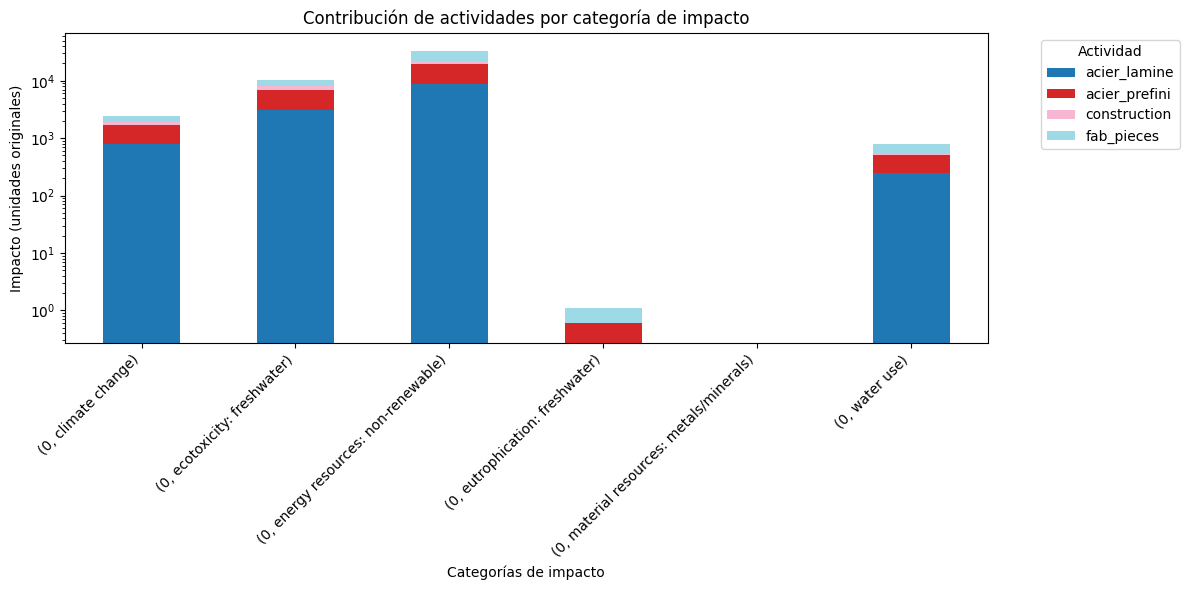

In [99]:
import matplotlib.pyplot as plt

# Transponer: columnas → ejes X (impactos), filas → actividades para apilar
df_plot = dfresults.transpose()

# Crear el gráfico
ax = df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Mejoras estéticas
ax.set_ylabel("Impacto (unidades originales)")
ax.set_xlabel("Categorías de impacto")
ax.set_title("Contribución de actividades por categoría de impacto")
plt.yscale("log")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Actividad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [86]:
config = {
    "impact_categories": list(impact_category_to_method.keys())
}

config


{'impact_categories': ['water use',
  'climate change',
  'energy resources: non-renewable',
  'material resources: metals/minerals',
  'eutrophication: freshwater',
  'ecotoxicity: freshwater']}

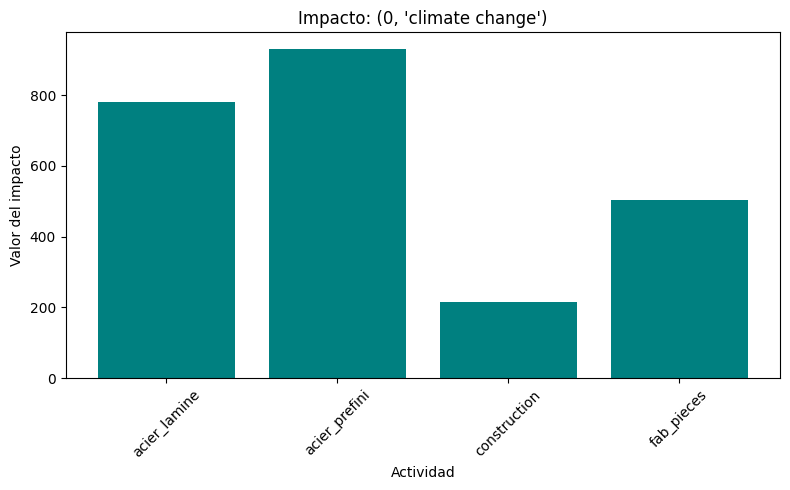

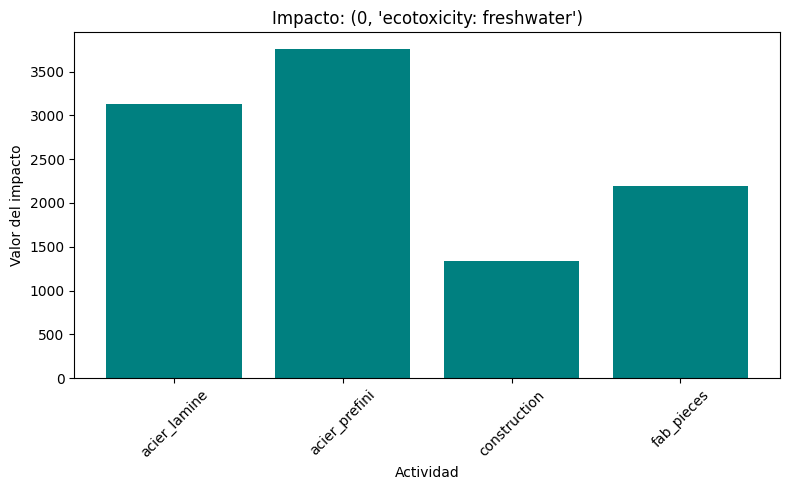

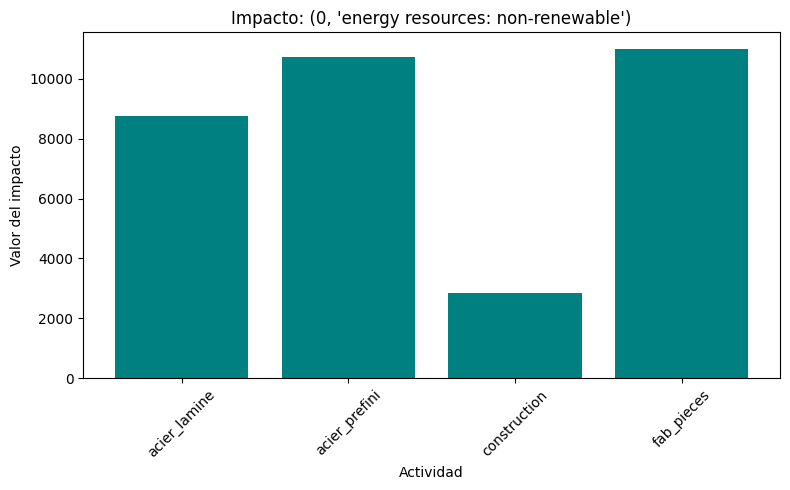

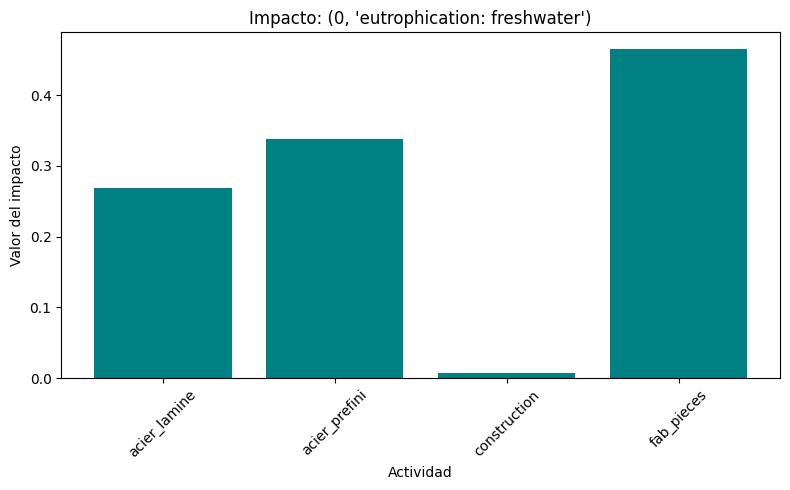

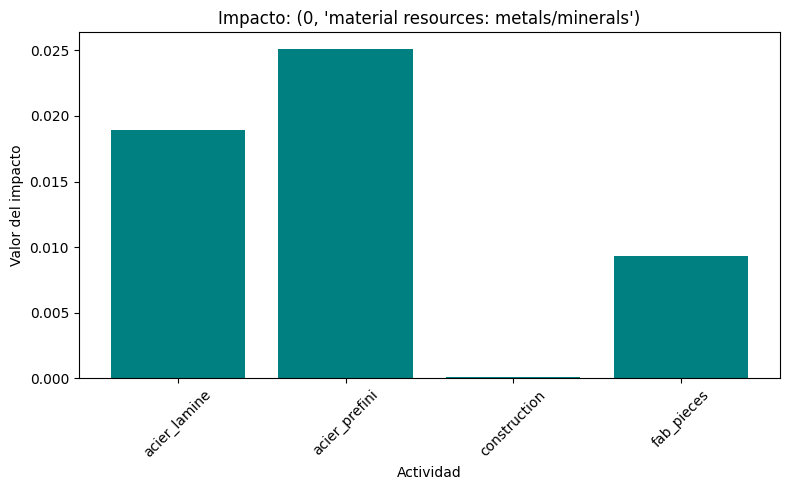

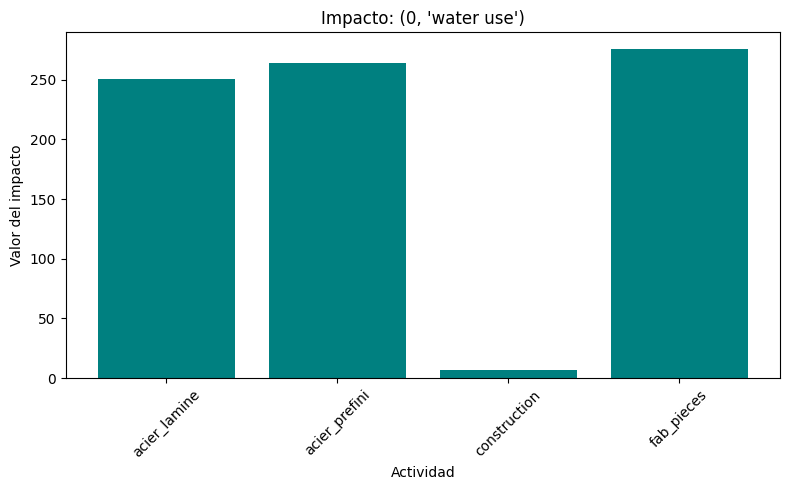

In [100]:
import matplotlib.pyplot as plt

# Suponemos que dfresults ya tiene las columnas renombradas con los nombres de las categorías de impacto
# Y que su índice corresponde a las actividades (por ejemplo: acier_lamine, etc.)

# Transponemos para tener las categorías como claves y las actividades como índices
df_plot = dfresults.T

# Creamos un gráfico de barras para cada categoría de impacto
for category in df_plot.index:
    plt.figure(figsize=(8, 5))
    plt.bar(df_plot.columns, df_plot.loc[category], color='teal')
    plt.title(f'Impacto: {category}')
    plt.ylabel('Valor del impacto')
    plt.xlabel('Actividad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
